In [62]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [4]:
df= pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
df.head()

,col1,col2,col3,col4,col5,target
0,-0.346753,-3.301972,-0.576501,-3.162269,0.025926,0
1,-5.090288,0.614276,2.448817,1.366684,1.946524,0
2,0.903301,-0.004551,0.803610,-0.974240,0.485502,0
3,-2.163112,-1.991644,1.933764,-2.043448,1.172396,0
4,-0.616846,-2.025876,0.456797,-2.462939,0.339902,0


In [5]:
# function for row sampling
def sample_rows(data,percent):
    return data.sample(int(percent*data.shape[0]),replace=True)

In [63]:
def sampling_features(data,percent):
    col= random.sample(data.columns.tolist()[:-1],int((data.shape[1]-1)*percent))
    df=data[col+['target']]
    return df

In [14]:
def combined_sampling(data,row_percent,col_percent):
    new_df=sample_rows(data,row_percent)
    return sampling_features(new_df,col_percent)

In [64]:
df1=combined_sampling(df,0.5,0.5)
df2=combined_sampling(df,0.5,0.5)
df3=combined_sampling(df,0.5,0.5)


In [65]:
df1.shape

(50, 3)

In [66]:
df3.shape

(50, 3)

In [67]:
df2.shape

(50, 3)

In [68]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col1', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [73]:
df3

,col1,col5,target
30,-1.324493,0.542899,0
14,0.130145,1.259167,0
22,-0.927973,-0.385750,0
10,-0.961543,-0.108072,0
71,1.075847,0.852421,1
12,-0.830020,-0.529379,0
60,1.038624,0.869037,1
66,1.936865,-0.412443,1
82,1.988775,-0.337734,1
59,-2.004889,2.240465,0


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
cf1=DecisionTreeClassifier()
cf2=DecisionTreeClassifier()
cf3=DecisionTreeClassifier()

In [78]:
cf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
cf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
cf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [79]:
from sklearn.tree import plot_tree

[Text(0.5555555555555556, 0.9166666666666666, 'X[1] <= -0.303\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.3333333333333333, 0.75, 'X[1] <= -2.32\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.2222222222222222, 0.5833333333333334, 'X[0] <= 2.063\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4444444444444444, 0.5833333333333334, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.7777777777777778, 0.75, 'X[0] <= 2.882\ngini = 0.225\nsamples = 31\nvalue = [4, 27]'),
 Text(0.6666666666666666, 0.5833333333333334, 'X[0] <= 1.158\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.5555555555555556, 0.4166666666666667, 'X[0] <= 1.112\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.4444444444444444, 0.25, 'X[1] <= 0.612\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.3

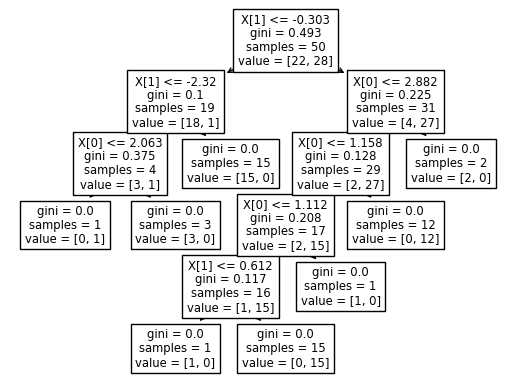

In [80]:
plot_tree(cf1)

[Text(0.5357142857142857, 0.9545454545454546, 'X[0] <= 0.968\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.2857142857142857, 0.8636363636363636, 'X[0] <= -0.4\ngini = 0.444\nsamples = 36\nvalue = [24, 12]'),
 Text(0.14285714285714285, 0.7727272727272727, 'X[1] <= 2.252\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.07142857142857142, 0.6818181818181818, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.21428571428571427, 0.6818181818181818, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.42857142857142855, 0.7727272727272727, 'X[0] <= -0.327\ngini = 0.496\nsamples = 22\nvalue = [12, 10]'),
 Text(0.35714285714285715, 0.6818181818181818, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.6818181818181818, 'X[1] <= 2.635\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.42857142857142855, 0.5909090909090909, 'X[1] <= 1.96\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.35714285714285715, 0.5, 'X[0] <= 0.398\ngini = 0.444\nsamples = 12\nvalue =

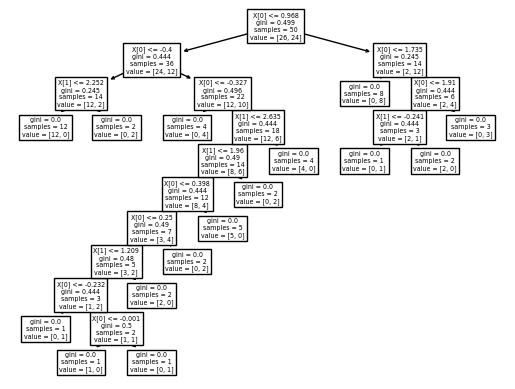

In [81]:
plot_tree(cf2)

[Text(0.4583333333333333, 0.9285714285714286, 'X[0] <= -0.273\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.375, 0.7857142857142857, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.5416666666666666, 0.7857142857142857, 'X[1] <= 1.3\ngini = 0.264\nsamples = 32\nvalue = [5, 27]'),
 Text(0.4583333333333333, 0.6428571428571429, 'X[0] <= 0.795\ngini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(0.25, 0.5, 'X[1] <= 0.108\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[1] <= -0.8\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.5, 'X[1] <= 1.112\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.5, 0.35714285714285715, 'X[0] <= 0.971\ngini = 0

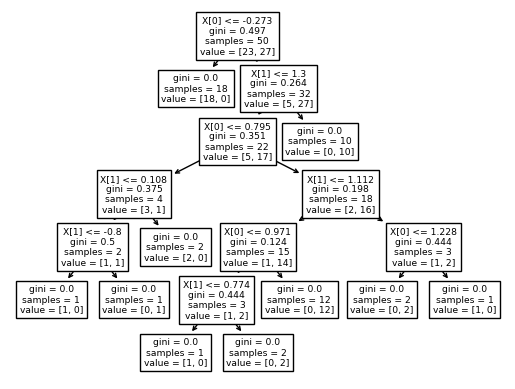

In [82]:
plot_tree(cf3)

In [83]:
cf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [84]:
cf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [85]:
cf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [86]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
59,-2.004889,-2.292945,1.808164,-1.946936,2.240465,0
73,0.319301,-0.674620,-1.216114,3.009032,1.570422,1
50,-0.238707,1.028579,1.867330,-0.119797,2.976348,1
53,-0.215571,-1.114579,-1.012860,2.185805,2.799468,1
74,-1.483453,-0.783058,1.092698,-1.001273,0.297562,0
18,0.649833,-0.327838,0.082100,-0.265408,0.770088,0
66,1.936865,0.173288,-0.020681,1.153342,-0.412443,1
10,-0.961543,-0.220657,2.814212,-2.449974,-0.108072,0
76,2.641052,1.583879,1.918802,1.049481,-1.359708,1
71,1.075847,2.847427,3.191032,-0.632241,0.852421,1


In [87]:
cf1.predict(np.array([-0.215571,2.799468]).reshape(1,2))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [88]:
cf2.predict(np.array([-0.215571,2.799468]).reshape(1,2))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [89]:
cf3.predict(np.array([-0.215571,2.799468]).reshape(1,2))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
 # we got 2 times 1 and 1 time 0
# so it will be 1
# and in actual data-set it was 1 so answer is correct